In [ ]:
!pip install prophet

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from prophet import Prophet

In [3]:
from google.colab import files
uploaded = files.upload()

Saving CPI_data.csv to CPI_data.csv


In [4]:
df = pd.read_csv('CPI_data.csv')

In [8]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")

In [9]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1980-01-01,77.8
1,1980-02-01,78.9
2,1980-03-01,80.1
3,1980-04-01,81.0
4,1980-05-01,81.8


In [21]:
train_set = df.iloc[:456]
test_set = df.iloc[456:]

In [22]:
# Training the model
m = Prophet(interval_width=0.90)
model = m.fit(train_set)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptxhun4oo/ktrfs3ji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptxhun4oo/36llx8v4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99111', 'data', 'file=/tmp/tmptxhun4oo/ktrfs3ji.json', 'init=/tmp/tmptxhun4oo/36llx8v4.json', 'output', 'file=/tmp/tmptxhun4oo/prophet_modela9jhbzdd/prophet_model-20230420065525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:55:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:55:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)

In [25]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
487,2020-08-01,256.397730,253.011463,260.073439,253.098612,259.383837,0.271604,0.271604,0.271604,0.271604,0.271604,0.271604,0.0,0.0,0.0,256.669334
488,2020-09-01,256.698389,253.346219,260.558900,253.242943,259.809346,0.479494,0.479494,0.479494,0.479494,0.479494,0.479494,0.0,0.0,0.0,257.177883
489,2020-10-01,256.989349,253.255661,261.188981,253.391146,260.290036,0.290622,0.290622,0.290622,0.290622,0.290622,0.290622,0.0,0.0,0.0,257.279971
490,2020-11-01,257.290008,252.856428,260.760623,253.549048,260.731411,-0.421566,-0.421566,-0.421566,-0.421566,-0.421566,-0.421566,0.0,0.0,0.0,256.868442
491,2020-12-01,257.580968,252.507120,260.493719,253.669046,261.254309,-0.969392,-0.969392,-0.969392,-0.969392,-0.969392,-0.969392,0.0,0.0,0.0,256.611577


In [26]:
forecast[['ds','yhat']]

,ds,yhat
0,1980-01-01,78.867397
1,1980-02-01,79.751391
2,1980-03-01,80.867554
3,1980-04-01,81.692322
4,1980-05-01,82.369937
...,...,...
487,2020-08-01,256.669334
488,2020-09-01,257.177883
489,2020-10-01,257.279971
490,2020-11-01,256.868442


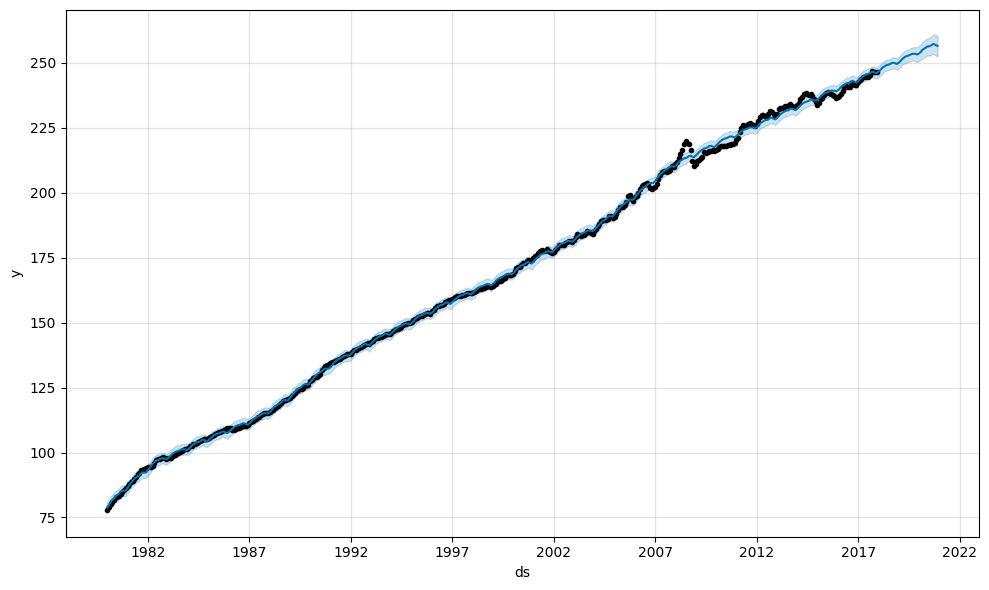

In [27]:
plot1 = m.plot(forecast)

In [28]:
forecast.to_excel('prophet_forecast.xlsx', index=False)

In [29]:
from google.colab import files

# Download the Excel file
files.download('prophet_forecast.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import pickle

# save the trained model to a file
with open('trained_prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [31]:
files.download('trained_prophet_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>